# I have trained this model on 10,000 datasets which predicts weight of a person corresponding to height.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv('weight-height.csv')
df.head(3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


In [15]:
#  Now X, its input of our model
#y_true is true output
X=df[['Height']].values
y_true=df[['Weight']].values


In [16]:
def line(X,w=0,b=0):
    return w*X+b
def mean_squared_error(y_true,y_pred):    # this should be minimized, its most commonly used in regression problem,
    s= (y_true-y_pred)**2
    return np.sqrt(s.mean())


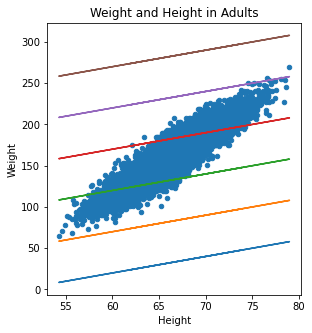

In [19]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(121)
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='Weight and Height in Adults', ax=ax1)
bs=np.array([-100,-50,0,50,100,150])  # Supposed values ,, but no need in deep learning
mses=[]
for b in bs:
    y_pred=line(X, w=2, b=b)
    mse=mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X,y_pred)

Text(0.5, 0, 'b')

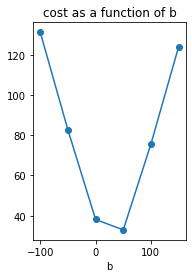

In [18]:
ax2=plt.subplot(122)
plt.plot(bs,mses, 'o-')
plt.title('cost as a function of b')
plt.xlabel ('b')


# Now solve this problem by DEEP LEARNING

In [21]:
from tensorflow.keras.models import Sequential    #Capital S
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [22]:
X.shape

(10000, 1)

In [23]:
model=Sequential()
model.add(Dense(1,input_shape=(1,)))


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(Adam(lr=0.8),'mean_squared_error')
model.fit(X,y_true,epochs=40)


Train on 10000 samples
Epoch 1/40
10000/10000 [==============================] - 1s 136us/sample - loss: 835.2195
Epoch 2/40
10000/10000 [==============================] - 1s 53us/sample - loss: 547.6970
Epoch 3/40
10000/10000 [==============================] - 1s 50us/sample - loss: 516.5361
Epoch 4/40
10000/10000 [==============================] - 0s 50us/sample - loss: 481.2584
Epoch 5/40
10000/10000 [==============================] - 1s 51us/sample - loss: 443.6298
Epoch 6/40
10000/10000 [==============================] - 1s 54us/sample - loss: 383.0040
Epoch 7/40
10000/10000 [==============================] - 1s 56us/sample - loss: 362.2824
Epoch 8/40
10000/10000 [==============================] - 1s 57us/sample - loss: 332.1031
Epoch 9/40
10000/10000 [==============================] - 1s 59us/sample - loss: 298.4701
Epoch 10/40
10000/10000 [==============================] - 1s 107us/sample - loss: 269.0480
Epoch 11/40
10000/10000 [==============================] - 1s 118us/sample

In [27]:
y_pred=model.predict(X)
y_pred

array([[215.82767],
       [177.14822],
       [217.83676],
       ...,
       [139.62335],
       [179.07516],
       [124.93274]], dtype=float32)

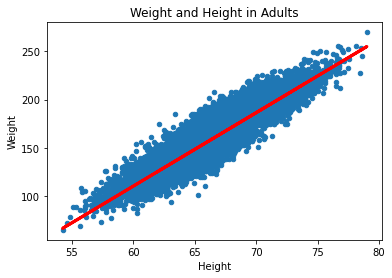

In [28]:
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='Weight and Height in Adults')
plt.plot(X,y_pred, color='red', linewidth=3 )

# Now see the result, machine learning automatically found w and b

In [30]:
w,b =model.get_weights()   # Get learned values from model
w


array([[7.636454]], dtype=float32)

In [31]:
b

array([-348.10165], dtype=float32)

# Predict the value,   give height, model will tell you weight of person

In [35]:
z=model.predict([[64]])
z

array([[140.63141]], dtype=float32)

In [36]:
z/2.20

array([[63.923367]], dtype=float32)

This is my predicted weight which is almost correct (64)